In [3]:
import pandas as pd

In [4]:
import numpy as np

In [20]:
df = pd.read_csv('placement.csv')

In [21]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.shape

(100, 4)

In [23]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [24]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [27]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [28]:
df = df.iloc[:,0:]

In [30]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [31]:
import matplotlib.pyplot as plt

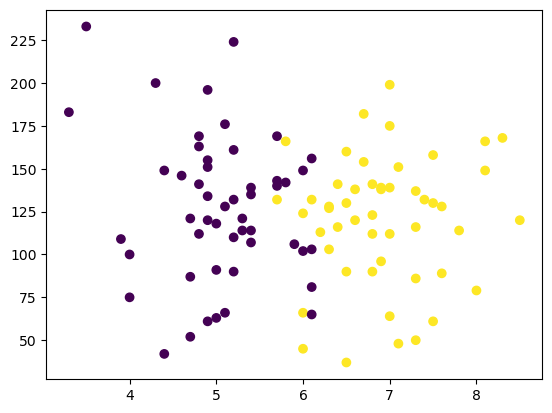

In [32]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [33]:
X = df.drop('placement',axis=1)
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [34]:
y = df['placement']

In [35]:
X.shape

(100, 2)

In [36]:
y.shape

(100,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_test

1     0
33    0
39    0
83    1
57    1
13    1
53    1
3     1
22    0
11    1
Name: placement, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

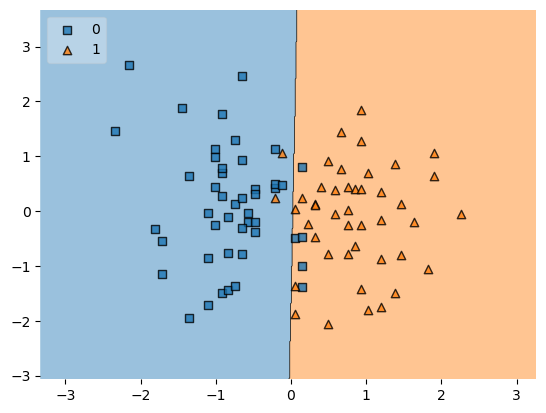

In [51]:
plot_decision_regions(X_train,y_train.values,clf=lr,legend=2)

In [52]:
import pickle

In [53]:
pickle.dump(lr,open('lrmodel_placement.pkl','wb'))